## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.5ms	remaining: 49.5s
1:	learn: 0.9301086	total: 51.6ms	remaining: 25.8s
2:	learn: 0.9005637	total: 53.6ms	remaining: 17.8s
3:	learn: 0.8720983	total: 55.9ms	remaining: 13.9s
4:	learn: 0.8467410	total: 58.1ms	remaining: 11.6s
5:	learn: 0.8226672	total: 60ms	remaining: 9.94s
6:	learn: 0.7994702	total: 62.1ms	remaining: 8.8s
7:	learn: 0.7784272	total: 64.1ms	remaining: 7.95s
8:	learn: 0.7602192	total: 66.2ms	remaining: 7.29s
9:	learn: 0.7412421	total: 68.8ms	remaining: 6.81s
10:	learn: 0.7247930	total: 70.9ms	remaining: 6.37s
11:	learn: 0.7089951	total: 73ms	remaining: 6.01s
12:	learn: 0.6951345	total: 75.2ms	remaining: 5.71s
13:	learn: 0.6809276	total: 77.5ms	remaining: 5.46s
14:	learn: 0.6692630	total: 79.8ms	remaining: 5.24s
15:	learn: 0.6588323	total: 81.8ms	remaining: 5.03s
16:	learn: 0.6472700	total: 83.8ms	remaining: 4.84s
17:	learn: 0.6379982	total: 85.7ms	remaining: 4.68s
18:	learn: 0.6294674	total: 87.8ms	remaining: 4.53s
19:	learn: 0.6193295	total:

56:	learn: 0.4861566	total: 165ms	remaining: 2.72s
57:	learn: 0.4850201	total: 167ms	remaining: 2.71s
58:	learn: 0.4840055	total: 169ms	remaining: 2.69s
59:	learn: 0.4824455	total: 171ms	remaining: 2.68s
60:	learn: 0.4809744	total: 173ms	remaining: 2.67s
61:	learn: 0.4801376	total: 175ms	remaining: 2.65s
62:	learn: 0.4792422	total: 177ms	remaining: 2.63s
63:	learn: 0.4780719	total: 179ms	remaining: 2.62s
64:	learn: 0.4771984	total: 181ms	remaining: 2.61s
65:	learn: 0.4759610	total: 183ms	remaining: 2.6s
66:	learn: 0.4750287	total: 185ms	remaining: 2.58s
67:	learn: 0.4740093	total: 187ms	remaining: 2.57s
68:	learn: 0.4732612	total: 189ms	remaining: 2.55s
69:	learn: 0.4727266	total: 191ms	remaining: 2.54s
70:	learn: 0.4716549	total: 193ms	remaining: 2.53s
71:	learn: 0.4709088	total: 195ms	remaining: 2.52s
72:	learn: 0.4697594	total: 197ms	remaining: 2.51s
73:	learn: 0.4690934	total: 200ms	remaining: 2.5s
74:	learn: 0.4680942	total: 202ms	remaining: 2.48s
75:	learn: 0.4672726	total: 204ms

81:	learn: 0.4620203	total: 216ms	remaining: 2.42s
82:	learn: 0.4608838	total: 218ms	remaining: 2.41s
83:	learn: 0.4604376	total: 220ms	remaining: 2.4s
84:	learn: 0.4596603	total: 222ms	remaining: 2.39s
85:	learn: 0.4587835	total: 224ms	remaining: 2.38s
86:	learn: 0.4583577	total: 226ms	remaining: 2.38s
87:	learn: 0.4577999	total: 228ms	remaining: 2.37s
88:	learn: 0.4572657	total: 230ms	remaining: 2.36s
89:	learn: 0.4569360	total: 232ms	remaining: 2.35s
90:	learn: 0.4559969	total: 234ms	remaining: 2.34s
91:	learn: 0.4549716	total: 236ms	remaining: 2.33s
92:	learn: 0.4544919	total: 238ms	remaining: 2.32s
93:	learn: 0.4537693	total: 240ms	remaining: 2.31s
94:	learn: 0.4532673	total: 242ms	remaining: 2.31s
95:	learn: 0.4526987	total: 244ms	remaining: 2.3s
96:	learn: 0.4520952	total: 246ms	remaining: 2.29s
97:	learn: 0.4513919	total: 248ms	remaining: 2.28s
98:	learn: 0.4503747	total: 250ms	remaining: 2.28s
99:	learn: 0.4494783	total: 252ms	remaining: 2.27s
100:	learn: 0.4487329	total: 254m

136:	learn: 0.4307446	total: 330ms	remaining: 2.08s
137:	learn: 0.4304464	total: 332ms	remaining: 2.08s
138:	learn: 0.4298257	total: 334ms	remaining: 2.07s
139:	learn: 0.4295800	total: 337ms	remaining: 2.07s
140:	learn: 0.4292928	total: 339ms	remaining: 2.06s
141:	learn: 0.4288053	total: 340ms	remaining: 2.06s
142:	learn: 0.4282748	total: 343ms	remaining: 2.05s
143:	learn: 0.4277528	total: 345ms	remaining: 2.05s
144:	learn: 0.4274087	total: 347ms	remaining: 2.04s
145:	learn: 0.4271984	total: 348ms	remaining: 2.04s
146:	learn: 0.4268458	total: 350ms	remaining: 2.03s
147:	learn: 0.4264987	total: 352ms	remaining: 2.03s
148:	learn: 0.4262192	total: 354ms	remaining: 2.02s
149:	learn: 0.4257966	total: 356ms	remaining: 2.02s
150:	learn: 0.4253062	total: 358ms	remaining: 2.01s
151:	learn: 0.4247446	total: 360ms	remaining: 2.01s
152:	learn: 0.4237365	total: 362ms	remaining: 2s
153:	learn: 0.4233079	total: 364ms	remaining: 2s
154:	learn: 0.4228876	total: 367ms	remaining: 2s
155:	learn: 0.4225404

161:	learn: 0.4197073	total: 381ms	remaining: 1.97s
162:	learn: 0.4192052	total: 383ms	remaining: 1.97s
163:	learn: 0.4187949	total: 385ms	remaining: 1.96s
164:	learn: 0.4184572	total: 388ms	remaining: 1.96s
165:	learn: 0.4180680	total: 390ms	remaining: 1.96s
166:	learn: 0.4176884	total: 392ms	remaining: 1.95s
167:	learn: 0.4173026	total: 394ms	remaining: 1.95s
168:	learn: 0.4170486	total: 396ms	remaining: 1.95s
169:	learn: 0.4165960	total: 398ms	remaining: 1.94s
170:	learn: 0.4161870	total: 400ms	remaining: 1.94s
171:	learn: 0.4156228	total: 402ms	remaining: 1.93s
172:	learn: 0.4153041	total: 404ms	remaining: 1.93s
173:	learn: 0.4148857	total: 406ms	remaining: 1.93s
174:	learn: 0.4144190	total: 408ms	remaining: 1.92s
175:	learn: 0.4140875	total: 410ms	remaining: 1.92s
176:	learn: 0.4136755	total: 412ms	remaining: 1.91s
177:	learn: 0.4133860	total: 413ms	remaining: 1.91s
178:	learn: 0.4129780	total: 416ms	remaining: 1.91s
179:	learn: 0.4122907	total: 418ms	remaining: 1.9s
180:	learn: 0

219:	learn: 0.3986243	total: 497ms	remaining: 1.76s
220:	learn: 0.3982897	total: 500ms	remaining: 1.76s
221:	learn: 0.3981001	total: 502ms	remaining: 1.76s
222:	learn: 0.3978579	total: 504ms	remaining: 1.76s
223:	learn: 0.3976462	total: 507ms	remaining: 1.75s
224:	learn: 0.3973704	total: 508ms	remaining: 1.75s
225:	learn: 0.3971729	total: 510ms	remaining: 1.75s
226:	learn: 0.3968841	total: 512ms	remaining: 1.74s
227:	learn: 0.3965787	total: 514ms	remaining: 1.74s
228:	learn: 0.3963073	total: 516ms	remaining: 1.74s
229:	learn: 0.3960925	total: 518ms	remaining: 1.73s
230:	learn: 0.3957018	total: 521ms	remaining: 1.73s
231:	learn: 0.3954162	total: 523ms	remaining: 1.73s
232:	learn: 0.3951665	total: 525ms	remaining: 1.73s
233:	learn: 0.3949269	total: 527ms	remaining: 1.72s
234:	learn: 0.3945894	total: 529ms	remaining: 1.72s
235:	learn: 0.3944181	total: 530ms	remaining: 1.72s
236:	learn: 0.3941497	total: 532ms	remaining: 1.71s
237:	learn: 0.3939819	total: 534ms	remaining: 1.71s
238:	learn: 

243:	learn: 0.3926199	total: 547ms	remaining: 1.69s
244:	learn: 0.3923955	total: 549ms	remaining: 1.69s
245:	learn: 0.3922312	total: 551ms	remaining: 1.69s
246:	learn: 0.3919499	total: 553ms	remaining: 1.69s
247:	learn: 0.3917420	total: 555ms	remaining: 1.68s
248:	learn: 0.3915186	total: 557ms	remaining: 1.68s
249:	learn: 0.3912759	total: 559ms	remaining: 1.68s
250:	learn: 0.3908375	total: 561ms	remaining: 1.67s
251:	learn: 0.3904815	total: 563ms	remaining: 1.67s
252:	learn: 0.3902127	total: 565ms	remaining: 1.67s
253:	learn: 0.3900274	total: 567ms	remaining: 1.67s
254:	learn: 0.3898171	total: 569ms	remaining: 1.66s
255:	learn: 0.3896180	total: 572ms	remaining: 1.66s
256:	learn: 0.3894251	total: 574ms	remaining: 1.66s
257:	learn: 0.3892139	total: 576ms	remaining: 1.66s
258:	learn: 0.3889352	total: 578ms	remaining: 1.65s
259:	learn: 0.3886531	total: 580ms	remaining: 1.65s
260:	learn: 0.3884539	total: 582ms	remaining: 1.65s
261:	learn: 0.3882459	total: 584ms	remaining: 1.65s
262:	learn: 

298:	learn: 0.3797228	total: 663ms	remaining: 1.55s
299:	learn: 0.3795554	total: 665ms	remaining: 1.55s
300:	learn: 0.3793733	total: 667ms	remaining: 1.55s
301:	learn: 0.3791607	total: 670ms	remaining: 1.55s
302:	learn: 0.3789297	total: 672ms	remaining: 1.54s
303:	learn: 0.3787482	total: 674ms	remaining: 1.54s
304:	learn: 0.3786528	total: 676ms	remaining: 1.54s
305:	learn: 0.3784406	total: 678ms	remaining: 1.54s
306:	learn: 0.3782934	total: 680ms	remaining: 1.53s
307:	learn: 0.3781631	total: 683ms	remaining: 1.53s
308:	learn: 0.3779278	total: 686ms	remaining: 1.53s
309:	learn: 0.3777358	total: 689ms	remaining: 1.53s
310:	learn: 0.3775809	total: 691ms	remaining: 1.53s
311:	learn: 0.3774323	total: 693ms	remaining: 1.53s
312:	learn: 0.3772732	total: 696ms	remaining: 1.53s
313:	learn: 0.3771184	total: 698ms	remaining: 1.52s
314:	learn: 0.3769370	total: 700ms	remaining: 1.52s
315:	learn: 0.3766643	total: 703ms	remaining: 1.52s
316:	learn: 0.3764891	total: 706ms	remaining: 1.52s
317:	learn: 

319:	learn: 0.3760168	total: 712ms	remaining: 1.51s
320:	learn: 0.3757763	total: 714ms	remaining: 1.51s
321:	learn: 0.3756076	total: 717ms	remaining: 1.51s
322:	learn: 0.3754123	total: 719ms	remaining: 1.51s
323:	learn: 0.3751852	total: 721ms	remaining: 1.5s
324:	learn: 0.3750004	total: 723ms	remaining: 1.5s
325:	learn: 0.3749086	total: 725ms	remaining: 1.5s
326:	learn: 0.3746654	total: 727ms	remaining: 1.5s
327:	learn: 0.3745405	total: 729ms	remaining: 1.49s
328:	learn: 0.3743710	total: 731ms	remaining: 1.49s
329:	learn: 0.3741679	total: 733ms	remaining: 1.49s
330:	learn: 0.3738646	total: 735ms	remaining: 1.49s
331:	learn: 0.3736647	total: 737ms	remaining: 1.48s
332:	learn: 0.3733429	total: 739ms	remaining: 1.48s
333:	learn: 0.3732059	total: 741ms	remaining: 1.48s
334:	learn: 0.3730574	total: 743ms	remaining: 1.48s
335:	learn: 0.3728663	total: 745ms	remaining: 1.47s
336:	learn: 0.3727111	total: 747ms	remaining: 1.47s
337:	learn: 0.3724765	total: 749ms	remaining: 1.47s
338:	learn: 0.37

376:	learn: 0.3659742	total: 830ms	remaining: 1.37s
377:	learn: 0.3658330	total: 833ms	remaining: 1.37s
378:	learn: 0.3656680	total: 835ms	remaining: 1.37s
379:	learn: 0.3654606	total: 837ms	remaining: 1.36s
380:	learn: 0.3651842	total: 839ms	remaining: 1.36s
381:	learn: 0.3650538	total: 841ms	remaining: 1.36s
382:	learn: 0.3649246	total: 843ms	remaining: 1.36s
383:	learn: 0.3647854	total: 845ms	remaining: 1.36s
384:	learn: 0.3646814	total: 848ms	remaining: 1.35s
385:	learn: 0.3645091	total: 850ms	remaining: 1.35s
386:	learn: 0.3643695	total: 852ms	remaining: 1.35s
387:	learn: 0.3641687	total: 854ms	remaining: 1.35s
388:	learn: 0.3640529	total: 856ms	remaining: 1.34s
389:	learn: 0.3639296	total: 858ms	remaining: 1.34s
390:	learn: 0.3637044	total: 860ms	remaining: 1.34s
391:	learn: 0.3636336	total: 862ms	remaining: 1.34s
392:	learn: 0.3635003	total: 864ms	remaining: 1.33s
393:	learn: 0.3633029	total: 866ms	remaining: 1.33s
394:	learn: 0.3632136	total: 869ms	remaining: 1.33s
395:	learn: 

398:	learn: 0.3625881	total: 879ms	remaining: 1.32s
399:	learn: 0.3622963	total: 881ms	remaining: 1.32s
400:	learn: 0.3622314	total: 883ms	remaining: 1.32s
401:	learn: 0.3620143	total: 885ms	remaining: 1.32s
402:	learn: 0.3618403	total: 888ms	remaining: 1.31s
403:	learn: 0.3616747	total: 890ms	remaining: 1.31s
404:	learn: 0.3614255	total: 892ms	remaining: 1.31s
405:	learn: 0.3613607	total: 894ms	remaining: 1.31s
406:	learn: 0.3612875	total: 896ms	remaining: 1.3s
407:	learn: 0.3611516	total: 898ms	remaining: 1.3s
408:	learn: 0.3609621	total: 900ms	remaining: 1.3s
409:	learn: 0.3608193	total: 902ms	remaining: 1.3s
410:	learn: 0.3604920	total: 905ms	remaining: 1.3s
411:	learn: 0.3603038	total: 907ms	remaining: 1.29s
412:	learn: 0.3602055	total: 909ms	remaining: 1.29s
413:	learn: 0.3599094	total: 911ms	remaining: 1.29s
414:	learn: 0.3597887	total: 913ms	remaining: 1.29s
415:	learn: 0.3595791	total: 915ms	remaining: 1.28s
416:	learn: 0.3594487	total: 917ms	remaining: 1.28s
417:	learn: 0.359

454:	learn: 0.3541744	total: 994ms	remaining: 1.19s
455:	learn: 0.3540636	total: 996ms	remaining: 1.19s
456:	learn: 0.3538004	total: 998ms	remaining: 1.19s
457:	learn: 0.3536614	total: 1s	remaining: 1.18s
458:	learn: 0.3534477	total: 1s	remaining: 1.18s
459:	learn: 0.3533592	total: 1s	remaining: 1.18s
460:	learn: 0.3532754	total: 1.01s	remaining: 1.18s
461:	learn: 0.3531467	total: 1.01s	remaining: 1.17s
462:	learn: 0.3529963	total: 1.01s	remaining: 1.17s
463:	learn: 0.3529036	total: 1.01s	remaining: 1.17s
464:	learn: 0.3527831	total: 1.01s	remaining: 1.17s
465:	learn: 0.3526445	total: 1.02s	remaining: 1.17s
466:	learn: 0.3525102	total: 1.02s	remaining: 1.16s
467:	learn: 0.3523547	total: 1.02s	remaining: 1.16s
468:	learn: 0.3522115	total: 1.02s	remaining: 1.16s
469:	learn: 0.3521029	total: 1.02s	remaining: 1.16s
470:	learn: 0.3519673	total: 1.03s	remaining: 1.15s
471:	learn: 0.3518082	total: 1.03s	remaining: 1.15s
472:	learn: 0.3516593	total: 1.03s	remaining: 1.15s
473:	learn: 0.3514906

477:	learn: 0.3509121	total: 1.04s	remaining: 1.14s
478:	learn: 0.3507270	total: 1.05s	remaining: 1.14s
479:	learn: 0.3506003	total: 1.05s	remaining: 1.14s
480:	learn: 0.3505111	total: 1.05s	remaining: 1.13s
481:	learn: 0.3503906	total: 1.05s	remaining: 1.13s
482:	learn: 0.3501522	total: 1.05s	remaining: 1.13s
483:	learn: 0.3500494	total: 1.05s	remaining: 1.13s
484:	learn: 0.3498921	total: 1.06s	remaining: 1.12s
485:	learn: 0.3497143	total: 1.06s	remaining: 1.12s
486:	learn: 0.3496172	total: 1.06s	remaining: 1.12s
487:	learn: 0.3494609	total: 1.06s	remaining: 1.11s
488:	learn: 0.3493200	total: 1.06s	remaining: 1.11s
489:	learn: 0.3491550	total: 1.07s	remaining: 1.11s
490:	learn: 0.3490323	total: 1.07s	remaining: 1.11s
491:	learn: 0.3488767	total: 1.07s	remaining: 1.11s
492:	learn: 0.3487285	total: 1.07s	remaining: 1.1s
493:	learn: 0.3486318	total: 1.07s	remaining: 1.1s
494:	learn: 0.3485016	total: 1.08s	remaining: 1.1s
495:	learn: 0.3484072	total: 1.08s	remaining: 1.1s
496:	learn: 0.34

534:	learn: 0.3433236	total: 1.16s	remaining: 1s
535:	learn: 0.3432219	total: 1.16s	remaining: 1s
536:	learn: 0.3431615	total: 1.16s	remaining: 1s
537:	learn: 0.3430198	total: 1.16s	remaining: 999ms
538:	learn: 0.3429422	total: 1.17s	remaining: 997ms
539:	learn: 0.3428024	total: 1.17s	remaining: 995ms
540:	learn: 0.3426641	total: 1.17s	remaining: 992ms
541:	learn: 0.3425885	total: 1.17s	remaining: 990ms
542:	learn: 0.3424695	total: 1.17s	remaining: 988ms
543:	learn: 0.3423997	total: 1.18s	remaining: 986ms
544:	learn: 0.3422315	total: 1.18s	remaining: 983ms
545:	learn: 0.3421242	total: 1.18s	remaining: 981ms
546:	learn: 0.3419673	total: 1.18s	remaining: 979ms
547:	learn: 0.3418121	total: 1.18s	remaining: 976ms
548:	learn: 0.3416228	total: 1.19s	remaining: 974ms
549:	learn: 0.3414331	total: 1.19s	remaining: 972ms
550:	learn: 0.3413090	total: 1.19s	remaining: 969ms
551:	learn: 0.3411591	total: 1.19s	remaining: 967ms
552:	learn: 0.3410901	total: 1.19s	remaining: 965ms
553:	learn: 0.3409923

559:	learn: 0.3404352	total: 1.21s	remaining: 949ms
560:	learn: 0.3403419	total: 1.21s	remaining: 946ms
561:	learn: 0.3402836	total: 1.21s	remaining: 944ms
562:	learn: 0.3402264	total: 1.21s	remaining: 942ms
563:	learn: 0.3400466	total: 1.22s	remaining: 939ms
564:	learn: 0.3399235	total: 1.22s	remaining: 937ms
565:	learn: 0.3398064	total: 1.22s	remaining: 935ms
566:	learn: 0.3396466	total: 1.22s	remaining: 932ms
567:	learn: 0.3395531	total: 1.22s	remaining: 930ms
568:	learn: 0.3394093	total: 1.22s	remaining: 928ms
569:	learn: 0.3393241	total: 1.23s	remaining: 925ms
570:	learn: 0.3392368	total: 1.23s	remaining: 923ms
571:	learn: 0.3391373	total: 1.23s	remaining: 921ms
572:	learn: 0.3390261	total: 1.23s	remaining: 919ms
573:	learn: 0.3389126	total: 1.23s	remaining: 916ms
574:	learn: 0.3388268	total: 1.24s	remaining: 914ms
575:	learn: 0.3387474	total: 1.24s	remaining: 912ms
576:	learn: 0.3386361	total: 1.24s	remaining: 910ms
577:	learn: 0.3385706	total: 1.24s	remaining: 907ms
578:	learn: 

617:	learn: 0.3346458	total: 1.32s	remaining: 819ms
618:	learn: 0.3345381	total: 1.33s	remaining: 817ms
619:	learn: 0.3344101	total: 1.33s	remaining: 814ms
620:	learn: 0.3343267	total: 1.33s	remaining: 812ms
621:	learn: 0.3342275	total: 1.33s	remaining: 810ms
622:	learn: 0.3341456	total: 1.33s	remaining: 808ms
623:	learn: 0.3340640	total: 1.34s	remaining: 805ms
624:	learn: 0.3339122	total: 1.34s	remaining: 803ms
625:	learn: 0.3337503	total: 1.34s	remaining: 801ms
626:	learn: 0.3336593	total: 1.34s	remaining: 799ms
627:	learn: 0.3335713	total: 1.34s	remaining: 797ms
628:	learn: 0.3333915	total: 1.35s	remaining: 795ms
629:	learn: 0.3333158	total: 1.35s	remaining: 793ms
630:	learn: 0.3332088	total: 1.35s	remaining: 790ms
631:	learn: 0.3331129	total: 1.35s	remaining: 788ms
632:	learn: 0.3330288	total: 1.35s	remaining: 786ms
633:	learn: 0.3328844	total: 1.36s	remaining: 784ms
634:	learn: 0.3328544	total: 1.36s	remaining: 782ms
635:	learn: 0.3327021	total: 1.36s	remaining: 779ms
636:	learn: 

640:	learn: 0.3322206	total: 1.37s	remaining: 769ms
641:	learn: 0.3321031	total: 1.38s	remaining: 767ms
642:	learn: 0.3319978	total: 1.38s	remaining: 765ms
643:	learn: 0.3319044	total: 1.38s	remaining: 762ms
644:	learn: 0.3318169	total: 1.38s	remaining: 760ms
645:	learn: 0.3316585	total: 1.38s	remaining: 758ms
646:	learn: 0.3316256	total: 1.39s	remaining: 756ms
647:	learn: 0.3315220	total: 1.39s	remaining: 754ms
648:	learn: 0.3313829	total: 1.39s	remaining: 752ms
649:	learn: 0.3313125	total: 1.39s	remaining: 750ms
650:	learn: 0.3311735	total: 1.39s	remaining: 747ms
651:	learn: 0.3310386	total: 1.4s	remaining: 745ms
652:	learn: 0.3309129	total: 1.4s	remaining: 743ms
653:	learn: 0.3308321	total: 1.4s	remaining: 741ms
654:	learn: 0.3307342	total: 1.4s	remaining: 739ms
655:	learn: 0.3306809	total: 1.4s	remaining: 737ms
656:	learn: 0.3305729	total: 1.41s	remaining: 734ms
657:	learn: 0.3304900	total: 1.41s	remaining: 732ms
658:	learn: 0.3303842	total: 1.41s	remaining: 730ms
659:	learn: 0.330

695:	learn: 0.3269516	total: 1.49s	remaining: 650ms
696:	learn: 0.3267980	total: 1.49s	remaining: 649ms
697:	learn: 0.3266887	total: 1.49s	remaining: 647ms
698:	learn: 0.3265888	total: 1.5s	remaining: 644ms
699:	learn: 0.3265229	total: 1.5s	remaining: 642ms
700:	learn: 0.3264350	total: 1.5s	remaining: 640ms
701:	learn: 0.3263223	total: 1.5s	remaining: 638ms
702:	learn: 0.3262539	total: 1.5s	remaining: 636ms
703:	learn: 0.3261258	total: 1.51s	remaining: 634ms
704:	learn: 0.3260520	total: 1.51s	remaining: 631ms
705:	learn: 0.3259475	total: 1.51s	remaining: 629ms
706:	learn: 0.3258911	total: 1.51s	remaining: 627ms
707:	learn: 0.3257903	total: 1.51s	remaining: 625ms
708:	learn: 0.3256952	total: 1.52s	remaining: 623ms
709:	learn: 0.3255982	total: 1.52s	remaining: 621ms
710:	learn: 0.3255301	total: 1.52s	remaining: 618ms
711:	learn: 0.3254442	total: 1.52s	remaining: 616ms
712:	learn: 0.3253361	total: 1.52s	remaining: 614ms
713:	learn: 0.3252431	total: 1.53s	remaining: 612ms
714:	learn: 0.325

718:	learn: 0.3247371	total: 1.54s	remaining: 601ms
719:	learn: 0.3246676	total: 1.54s	remaining: 599ms
720:	learn: 0.3245862	total: 1.54s	remaining: 597ms
721:	learn: 0.3245270	total: 1.54s	remaining: 595ms
722:	learn: 0.3244558	total: 1.55s	remaining: 592ms
723:	learn: 0.3243835	total: 1.55s	remaining: 590ms
724:	learn: 0.3242957	total: 1.55s	remaining: 588ms
725:	learn: 0.3242628	total: 1.55s	remaining: 586ms
726:	learn: 0.3242076	total: 1.55s	remaining: 583ms
727:	learn: 0.3240923	total: 1.55s	remaining: 581ms
728:	learn: 0.3240148	total: 1.56s	remaining: 579ms
729:	learn: 0.3239014	total: 1.56s	remaining: 577ms
730:	learn: 0.3237918	total: 1.56s	remaining: 575ms
731:	learn: 0.3236654	total: 1.56s	remaining: 573ms
732:	learn: 0.3235938	total: 1.56s	remaining: 570ms
733:	learn: 0.3235120	total: 1.57s	remaining: 568ms
734:	learn: 0.3234421	total: 1.57s	remaining: 566ms
735:	learn: 0.3233367	total: 1.57s	remaining: 564ms
736:	learn: 0.3232438	total: 1.57s	remaining: 562ms
737:	learn: 

776:	learn: 0.3197430	total: 1.66s	remaining: 475ms
777:	learn: 0.3196478	total: 1.66s	remaining: 473ms
778:	learn: 0.3194714	total: 1.66s	remaining: 471ms
779:	learn: 0.3194042	total: 1.66s	remaining: 469ms
780:	learn: 0.3193209	total: 1.66s	remaining: 467ms
781:	learn: 0.3192009	total: 1.67s	remaining: 464ms
782:	learn: 0.3191109	total: 1.67s	remaining: 462ms
783:	learn: 0.3190255	total: 1.67s	remaining: 460ms
784:	learn: 0.3189403	total: 1.67s	remaining: 458ms
785:	learn: 0.3188715	total: 1.67s	remaining: 456ms
786:	learn: 0.3188016	total: 1.68s	remaining: 454ms
787:	learn: 0.3187670	total: 1.68s	remaining: 451ms
788:	learn: 0.3186601	total: 1.68s	remaining: 449ms
789:	learn: 0.3185886	total: 1.68s	remaining: 447ms
790:	learn: 0.3185418	total: 1.68s	remaining: 445ms
791:	learn: 0.3184514	total: 1.69s	remaining: 443ms
792:	learn: 0.3183529	total: 1.69s	remaining: 441ms
793:	learn: 0.3182569	total: 1.69s	remaining: 439ms
794:	learn: 0.3181932	total: 1.69s	remaining: 436ms
795:	learn: 

799:	learn: 0.3177655	total: 1.7s	remaining: 426ms
800:	learn: 0.3176826	total: 1.7s	remaining: 423ms
801:	learn: 0.3176217	total: 1.71s	remaining: 421ms
802:	learn: 0.3174842	total: 1.71s	remaining: 419ms
803:	learn: 0.3173800	total: 1.71s	remaining: 417ms
804:	learn: 0.3172892	total: 1.71s	remaining: 415ms
805:	learn: 0.3172199	total: 1.71s	remaining: 413ms
806:	learn: 0.3171379	total: 1.72s	remaining: 410ms
807:	learn: 0.3170699	total: 1.72s	remaining: 408ms
808:	learn: 0.3170027	total: 1.72s	remaining: 406ms
809:	learn: 0.3169244	total: 1.72s	remaining: 404ms
810:	learn: 0.3168075	total: 1.72s	remaining: 402ms
811:	learn: 0.3167047	total: 1.73s	remaining: 400ms
812:	learn: 0.3166132	total: 1.73s	remaining: 398ms
813:	learn: 0.3165391	total: 1.73s	remaining: 395ms
814:	learn: 0.3164726	total: 1.73s	remaining: 393ms
815:	learn: 0.3164087	total: 1.74s	remaining: 391ms
816:	learn: 0.3163590	total: 1.74s	remaining: 389ms
817:	learn: 0.3162644	total: 1.74s	remaining: 387ms
818:	learn: 0.

858:	learn: 0.3131446	total: 1.82s	remaining: 299ms
859:	learn: 0.3130587	total: 1.82s	remaining: 297ms
860:	learn: 0.3129229	total: 1.83s	remaining: 295ms
861:	learn: 0.3128651	total: 1.83s	remaining: 293ms
862:	learn: 0.3127812	total: 1.83s	remaining: 291ms
863:	learn: 0.3126884	total: 1.83s	remaining: 288ms
864:	learn: 0.3126358	total: 1.83s	remaining: 286ms
865:	learn: 0.3125933	total: 1.84s	remaining: 284ms
866:	learn: 0.3125160	total: 1.84s	remaining: 282ms
867:	learn: 0.3124401	total: 1.84s	remaining: 280ms
868:	learn: 0.3123064	total: 1.84s	remaining: 278ms
869:	learn: 0.3122328	total: 1.84s	remaining: 276ms
870:	learn: 0.3121623	total: 1.85s	remaining: 273ms
871:	learn: 0.3121072	total: 1.85s	remaining: 271ms
872:	learn: 0.3120356	total: 1.85s	remaining: 269ms
873:	learn: 0.3119020	total: 1.85s	remaining: 267ms
874:	learn: 0.3118603	total: 1.85s	remaining: 265ms
875:	learn: 0.3117861	total: 1.86s	remaining: 263ms
876:	learn: 0.3116810	total: 1.86s	remaining: 261ms
877:	learn: 

881:	learn: 0.3113378	total: 1.87s	remaining: 250ms
882:	learn: 0.3112367	total: 1.87s	remaining: 248ms
883:	learn: 0.3111915	total: 1.87s	remaining: 246ms
884:	learn: 0.3111075	total: 1.87s	remaining: 244ms
885:	learn: 0.3110486	total: 1.88s	remaining: 241ms
886:	learn: 0.3109334	total: 1.88s	remaining: 239ms
887:	learn: 0.3108347	total: 1.88s	remaining: 237ms
888:	learn: 0.3107647	total: 1.88s	remaining: 235ms
889:	learn: 0.3107302	total: 1.88s	remaining: 233ms
890:	learn: 0.3106509	total: 1.89s	remaining: 231ms
891:	learn: 0.3106139	total: 1.89s	remaining: 229ms
892:	learn: 0.3105421	total: 1.89s	remaining: 226ms
893:	learn: 0.3104659	total: 1.89s	remaining: 224ms
894:	learn: 0.3104028	total: 1.89s	remaining: 222ms
895:	learn: 0.3103186	total: 1.9s	remaining: 220ms
896:	learn: 0.3102488	total: 1.9s	remaining: 218ms
897:	learn: 0.3101565	total: 1.9s	remaining: 216ms
898:	learn: 0.3100955	total: 1.9s	remaining: 214ms
899:	learn: 0.3100512	total: 1.9s	remaining: 212ms
900:	learn: 0.310

939:	learn: 0.3071693	total: 1.98s	remaining: 127ms
940:	learn: 0.3071043	total: 1.99s	remaining: 125ms
941:	learn: 0.3070506	total: 1.99s	remaining: 122ms
942:	learn: 0.3070046	total: 1.99s	remaining: 120ms
943:	learn: 0.3069525	total: 1.99s	remaining: 118ms
944:	learn: 0.3068968	total: 1.99s	remaining: 116ms
945:	learn: 0.3068564	total: 2s	remaining: 114ms
946:	learn: 0.3067279	total: 2s	remaining: 112ms
947:	learn: 0.3066517	total: 2s	remaining: 110ms
948:	learn: 0.3066014	total: 2s	remaining: 108ms
949:	learn: 0.3065250	total: 2s	remaining: 106ms
950:	learn: 0.3064465	total: 2.01s	remaining: 103ms
951:	learn: 0.3063837	total: 2.01s	remaining: 101ms
952:	learn: 0.3063292	total: 2.01s	remaining: 99.2ms
953:	learn: 0.3062107	total: 2.01s	remaining: 97.1ms
954:	learn: 0.3061348	total: 2.02s	remaining: 95ms
955:	learn: 0.3060576	total: 2.02s	remaining: 92.9ms
956:	learn: 0.3059772	total: 2.02s	remaining: 90.7ms
957:	learn: 0.3058989	total: 2.02s	remaining: 88.6ms
958:	learn: 0.3057985	t

961:	learn: 0.3054462	total: 2.03s	remaining: 80.2ms
962:	learn: 0.3053516	total: 2.03s	remaining: 78.1ms
963:	learn: 0.3052664	total: 2.03s	remaining: 75.9ms
964:	learn: 0.3052264	total: 2.04s	remaining: 73.8ms
965:	learn: 0.3051873	total: 2.04s	remaining: 71.7ms
966:	learn: 0.3051018	total: 2.04s	remaining: 69.6ms
967:	learn: 0.3050172	total: 2.04s	remaining: 67.5ms
968:	learn: 0.3049470	total: 2.04s	remaining: 65.4ms
969:	learn: 0.3049028	total: 2.04s	remaining: 63.3ms
970:	learn: 0.3048446	total: 2.05s	remaining: 61.2ms
971:	learn: 0.3047712	total: 2.05s	remaining: 59ms
972:	learn: 0.3047313	total: 2.05s	remaining: 56.9ms
973:	learn: 0.3046600	total: 2.05s	remaining: 54.8ms
974:	learn: 0.3045983	total: 2.06s	remaining: 52.7ms
975:	learn: 0.3044944	total: 2.06s	remaining: 50.6ms
976:	learn: 0.3044431	total: 2.06s	remaining: 48.5ms
977:	learn: 0.3043959	total: 2.06s	remaining: 46.4ms
978:	learn: 0.3043249	total: 2.06s	remaining: 44.3ms
979:	learn: 0.3042644	total: 2.06s	remaining: 42

# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1780603.2505017156


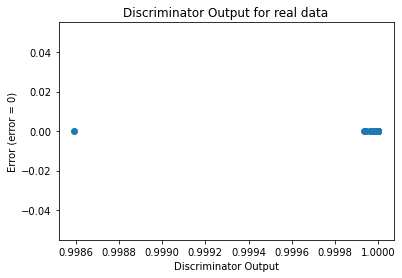

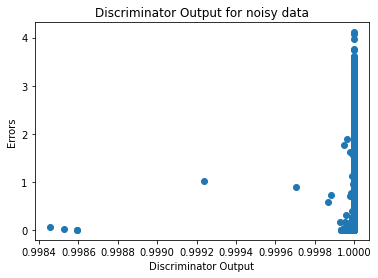

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0813]], device='cuda:0', requires_grad=True)
